We will use the linear congruent/ power residue method to generate a pseudorandom sequence over the interval [0, M-1]

$$r_{i+1} = (ar_i + c) \mod M$$

We are going to use $(a,c,M, r_1) = (57, 1, 256, 10)$


In [60]:
import math
from random import random

def lin_congruent(a,c,M,r_1):
    rand_num = [r_1/M]
    for i in range(0,M-1):
        rand_num.append((((a*rand_num[i])+c)%M)/M)

    return rand_num

def builtin_rand(n): 
    rand_num = []
    for i in range(n):
        rand_num.append(random())

    return rand_num

In [61]:


test_array = lin_congruent(273673163155,13,100000,10)
rand_array = builtin_rand(100000)

print(test_array)

print(rand_array)

#for i in range(128):
    #print(rand_array[2*i], rand_array[2*i+1])

[0.0001, 0.6732931550000235, 0.6747246612548828, 0.32317309661865234, 0.036112230224609375, 0.48287150444030763, 0.7203059262084961, 0.012777711486816406, 0.16733479023933412, 0.41363676986694337, 0.8321970318603515, 0.9409042471313477, 0.41551409759521485, 0.5743737782287598, 0.887341531677246, 0.6378591455078125, 0.30011468475341796, 0.3509873355102539, 0.14349436447143554, 0.5663281421661377, 0.1406330142211914, 0.81858935546875, 0.382491455078125, 0.4640398905944824, 0.6470209213256836, 0.6217966223144531, 0.48480891235351564, 0.8858252177429199, 0.8935517150878907, 0.2432367837524414, 0.8001817935180664, 0.8254413031005859, 0.3243132247924805, 0.2609495669555664, 0.9342565733337402, 0.5163559591674804, 0.6867229840087891, 0.5125792578125, 0.8686618911743164, 0.4748287954711914, 0.9842667948913574, 0.07159351379394531, 0.23394370136260986, 0.12765094123840331, 0.36881426864624023, 0.6753011450195312, 0.004526884765625, 0.8688604677462578, 0.9256145123291015, 0.5146427795410157, 0.1

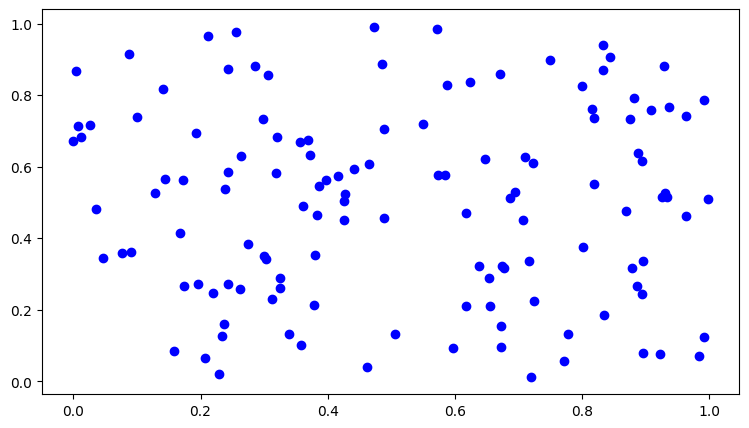

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (9,5))

for i in range(128):
    ax.scatter(test_array[2*i], test_array[2*i+1], color = 'blue')
    #ax.scatter(rand_array[2*i], rand_array[2*i+1], color = 'red')

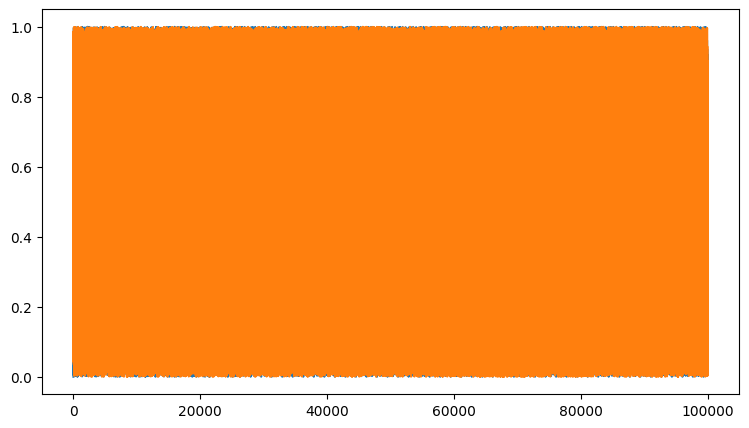

In [63]:
fig2, ax2 = plt.subplots(figsize = (9,5))


ax2.plot(test_array)
ax2.plot(rand_array)

After we are done with the initial test, we are going to test for the uniformity of the distribution, defined as

$$\left<x^k\right> = \frac{1}{N}\sum_{i = 1}^N x_i^k$$

This test is useful because, if the numbers are distributed uniformly, then the above equation is approximately similar to

$$\frac{1}{N} \sum_{i=1} x_i^k \approx \int_0^1 dx x^k P(x) \approx \frac{1}{k+1} + O\bigg(\frac{1}{\sqrt{N}}\bigg)$$

Let's test this, we'll take $k = 2$

Now this kinda begs the question, will different $k$ give different results? Meaning that they differ in performance

In [64]:
def k_moment(x_array, k):
    N = len(x_array)
    
    k_moment = 0
    for x in x_array:
        k_moment += x**k

    norm_moment = k_moment/N

    return norm_moment


In [65]:
test_moment = k_moment(test_array,2)
rand_moment = k_moment(rand_array,2)

print("This is the moment of the linear congruent method: ", test_moment)
print("This is the moment of the built-in random method: ", rand_moment)

This is the moment of the linear congruent method:  0.3268089601525613
This is the moment of the built-in random method:  0.33212716403242304


This is a little bit interesting, somehow the linear congruent method gives better performance (at least from this test) compared to the built-in random method.

Now, we are going to test for the near-neighbor correlation

$$C(k) = \frac{1}{N} \sum_{i = 1}^N x_i x_{i+k}, \quad (k = 1,2,\cdots)$$

If the random numbers $x_i$ and $x_{i+k}$ are distributed with the Joint probability distribution $P(x_i, x_{i+k}) = 1$, independent, and uniform, then we can approximate it as an integral

$$\frac{1}{N}\sum_{i = 1}^N x_i x_{i+k} \approx \int_0^1 dx \int_0^1 dy x y P(x,y) = \int_0^1\int_0^1 dy x y = \frac{1}{4} $$

Proof:
if the distribution $P(x,y)$ is uniform, then $P(x,y)$ must fulfill:

$$\int_0^1 dx \int_0^1 dy P(x,y) = 1 \quad \rightarrow P(x,y) = 1$$

Hence,

$$\int_0^1 dx \int_0^1 dy xy = \int_0^1 dx x \int_0^1 dy y = \frac{1}{4}$$


In [66]:
def short_correlation(x_array, k):
    N = len(x_array)
    sum = 0
    for i in range(N):
        sum += (1/N)*x_array[i]*x_array[(i+k)%N]

    return sum

In [67]:
test_correlation = short_correlation(test_array, 5)
rand_correlation = short_correlation(rand_array, 5)
print(test_correlation)
print(rand_correlation)

0.24544890438210673
0.2485583274824716


This is also interesting. In this case, the correlation of the distributions are similar. But we'll have to note that the result will be different if we use different $k$

In [83]:
from math import sqrt

test_k = [1,3,7]
test_N = [100, 10000, 100000]

def test_rand_N(N_array,k_array, man = True):
    max_N = max(N_array)
    if man:
        max_rand = lin_congruent(273673163155,13,max_N,10)
    else:
        max_rand = builtin_rand(max_N)
    
    for N in N_array:
        N_rand = max_rand[0:N]
        for k in k_array:
            print(sqrt(N))
            print(f"N: {N}, k: {k}, result = ",sqrt(N)*abs(k_moment(N_rand,k) - (1/(k+1))))
    

In [84]:
test_rand_N(test_N, test_k, man = False)

10.0
N: 100, k: 1, result =  0.5229404960770362
10.0
N: 100, k: 3, result =  0.5211400504726904
10.0
N: 100, k: 7, result =  0.3585210046334787
100.0
N: 10000, k: 1, result =  0.11474063824412073
100.0
N: 10000, k: 3, result =  0.3365594208840861
100.0
N: 10000, k: 7, result =  0.4361665271769219
316.22776601683796
N: 100000, k: 1, result =  0.2749197653038799
316.22776601683796
N: 100000, k: 3, result =  0.44305480555138527
316.22776601683796
N: 100000, k: 7, result =  0.4261911117132582
